In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
data = pd.read_csv("../preprocessed_data/Linux_process_LE-SS.csv")
data

,PID,TRUN,TSLPI,TSLPU,NICE,PRI,RTPR,CPUNR,EXC,CPU,Status_encoded,State_encoded,POLI_encoded,CMD_encoded,label
0,-0.071029,-0.297943,4.542246,-0.01036,-0.6463,0.455546,0.0,0.432490,-0.026928,0.513977,3,3,2,153,0
1,-1.009393,-0.297943,-0.430981,-0.01036,-0.6463,0.455546,0.0,-1.309256,-0.026928,0.291604,3,3,2,155,0
2,-0.102050,-0.297943,13.584476,-0.01036,-0.6463,0.455546,0.0,1.303364,-0.026928,0.124824,3,3,2,197,0
3,-0.320743,-0.297943,1.151409,-0.01036,-0.6463,0.455546,0.0,-1.309256,-0.026928,0.124824,3,3,2,177,0
4,-0.308851,-0.297943,0.473242,-0.01036,-0.6463,0.455546,0.0,-1.309256,-0.026928,0.013637,3,3,2,275,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,0.351881,-0.297943,-0.430981,-0.01036,-0.6463,0.455546,0.0,1.303364,-0.026928,-0.208737,0,3,2,160,0
999996,-0.659898,-0.297943,-0.430981,-0.01036,-0.6463,0.455546,0.0,1.303364,-0.026928,-0.208737,0,3,2,160,0
999997,-0.658347,-0.297943,-0.430981,-0.01036,-0.6463,0.455546,0.0,-1.309256,-0.026928,-0.208737,0,3,2,160,0
999998,-0.657313,-0.297943,-0.430981,-0.01036,-0.6463,0.455546,0.0,1.303364,-0.026928,-0.208737,0,3,2,160,0


In [ ]:
import tensorflow as tf
tf.config.set_visible_devices([], 'GPU')

In [2]:
X = data.drop(columns=['label']).values
y = data['label'].values

In [3]:
window_size = 30
X_windows = []
y_windows = []

for i in range(len(X) - window_size + 1):
    X_windows.append(X[i:i + window_size])
    y_windows.append(y[i + window_size - 1])  # ラベルはウィンドウの最後のデータに対応させます

X_windows = np.array(X_windows)
y_windows = np.array(y_windows)


# トレーニングデータとテストデータに分割
X_train, X_temp, y_train, y_temp = train_test_split(X_windows, y_windows, test_size=0.3, random_state=42, stratify=y_windows)
# テストデータをさらに検証データとテストデータに分割
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# LSTMモデルの構築
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1, activation='sigmoid'))

# モデルのコンパイル
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# モデルの概要
model.summary()

2024-11-01 14:05:41.824625: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-01 14:05:41.848651: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-01 14:05:42.258229: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-11-01 14:05:42.555178: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/t

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50)             │        13,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,051 (50.98 KB)

 Trainable params: 13,051 (50.98 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
# モデルの訓練
# モデルの訓練
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_val, y_val), verbose=1, shuffle=False)


Epoch 1/10


2024-11-01 14:05:45.030355: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8900


10938/10938 ━━━━━━━━━━━━━━━━━━━━ 65s 6ms/step - accuracy: 0.8854 - loss: 0.2460 - val_accuracy: 0.8970 - val_loss: 0.1942
Epoch 2/10
10938/10938 ━━━━━━━━━━━━━━━━━━━━ 75s 7ms/step - accuracy: 0.8977 - loss: 0.1935 - val_accuracy: 0.9048 - val_loss: 0.1807
Epoch 3/10
10938/10938 ━━━━━━━━━━━━━━━━━━━━ 71s 6ms/step - accuracy: 0.9061 - loss: 0.1786 - val_accuracy: 0.9149 - val_loss: 0.1667
Epoch 4/10
10938/10938 ━━━━━━━━━━━━━━━━━━━━ 75s 7ms/step - accuracy: 0.9138 - loss: 0.1682 - val_accuracy: 0.9198 - val_loss: 0.1584
Epoch 5/10
10938/10938 ━━━━━━━━━━━━━━━━━━━━ 67s 6ms/step - accuracy: 0.9186 - loss: 0.1610 - val_accuracy: 0.9220 - val_loss: 0.1534
Epoch 6/10
10938/10938 ━━━━━━━━━━━━━━━━━━━━ 70s 6ms/step - accuracy: 0.9234 - loss: 0.1535 - val_accuracy: 0.9264 - val_loss: 0.1474
Epoch 7/10
10938/10938 ━━━━━━━━━━━━━━━━━━━━ 63s 6ms/step - accuracy: 0.9285 - loss: 0.1463 - val_accuracy: 0.9294 - val_loss: 0.1433
Epoch 8/10
10938/10938 ━━━━━━━━━━━━━━━━━━━━ 55s 5ms/step - accuracy: 0.9328 - lo

In [6]:
# モデルの評価
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f'Test Accuracy: {accuracy:.4f}')

4688/4688 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9390 - loss: 0.1285
Test Accuracy: 0.9396


4688/4688 ━━━━━━━━━━━━━━━━━━━━ 4s 801us/step


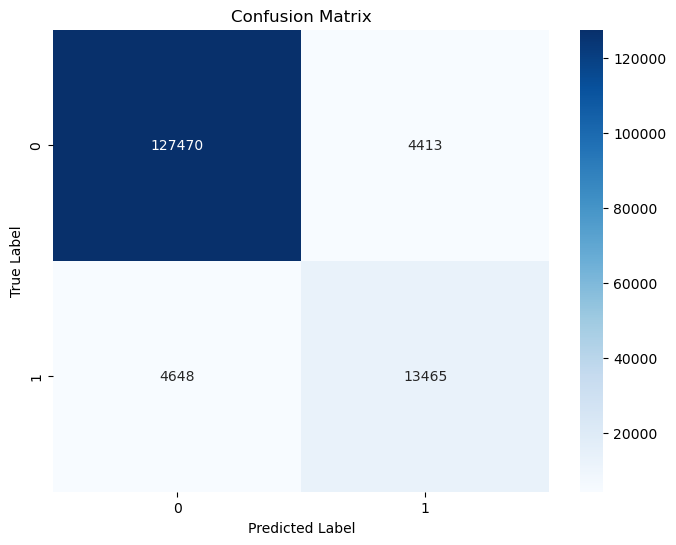

              precision    recall  f1-score   support

           0       0.96      0.97      0.97    131883
           1       0.75      0.74      0.75     18113

    accuracy                           0.94    149996
   macro avg       0.86      0.85      0.86    149996
weighted avg       0.94      0.94      0.94    149996



In [7]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# 予測の実行
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)  # 閾値0.5でクラスに変換

# 混同行列の計算
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# 混同行列の表示
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 精度、適合率、再現率、F1スコアのレポート
print(classification_report(y_test, y_pred_classes))


In [ ]:
import tensorflow as tf

# TensorFlowのバージョンを確認
print("TensorFlow version:", tf.__version__)

# 利用可能なGPUリストを表示
print("Available GPU devices:", tf.config.list_physical_devices('GPU'))
